In [108]:
from pathlib import Path
import pandas as pd
import numpy as np

In [109]:
processed = Path('../../data/processed')
selection_data = pd.read_pickle(Path(processed) / 'selection_data.pkl')

In [110]:
selection_data.ChooseTeam.value_counts()

False    21686
True     13066
Name: ChooseTeam, dtype: int64

In [111]:
selection_data = selection_data[selection_data.year >= 2000]
# selection_data = selection_data[(selection_data.year < 2000) & (selection_data.year >= 1960)]

In [112]:
selection_data[['spot', 'home']].value_counts()

spot  home
1.0   0.0     2124
      1.0     1546
2.0   0.0     1018
3.0   0.0      892
2.0   1.0      657
3.0   1.0      627
4.0   0.0      215
      1.0      150
5.0   0.0       60
      1.0       28
6.0   0.0       16
7.0   0.0        4
6.0   1.0        1
dtype: int64

In [113]:
def adjust_plot(plt):
    plt.xaxis.grid(False)
    plt.yaxis.grid(True, linestyle='dashed', color='lightgrey')
    plt.set_axisbelow(True)
    plt.xaxis.set_ticks_position('none') 
    plt.yaxis.set_ticks_position('none') 

    plt.spines['right'].set_visible(False)
    plt.spines['top'].set_visible(False)

In [114]:
Wins = selection_data.loc[selection_data['Win'] == True, 'Win'].count()
Loses = selection_data.loc[selection_data['Win'] == False, 'Win'].count()
WinRate = round( (Wins / (Wins + Loses)) *100, 1)
print('Win pick rate: ' + str(WinRate) + '%')

Win pick rate: 77.2%


In [115]:
day_wins = selection_data.groupby('Date')['Win'].prod()
print('Win both picks rate: ' + str(round(day_wins.mean()*100, 1)) + '%')

Win both picks rate: 60.0%


In [116]:
def streak_counter(df):
    df['L_Win'] = df['Win'].shift(1)
    df['L_year'] = df['year'].shift(1)
    df['start_of_streak'] = (df['Win'] != df['L_Win']) | (df['year'] != df['L_year'])
    df['streak_id'] = df['start_of_streak'].cumsum()
    df['streak_counter'] = df.groupby('streak_id').cumcount() + 1
    df.loc[df.Win == 0, 'streak_counter'] = 0
    
    return df

In [117]:
selection_data = selection_data.astype({'Win':'int8'})
selection_data = streak_counter(selection_data)
streaks = selection_data.groupby('streak_id').agg({'streak_counter':'max'})
streaks['streak_counter'].max()

34

In [118]:
year_results = selection_data.groupby('year').agg({'Win':'mean', 'streak_counter':'max'})
year_results

,Win,streak_counter
year,,
2000.0,0.773743,16
2001.0,0.783333,17
2002.0,0.841667,29
2003.0,0.758333,20
2004.0,0.772222,27
2005.0,0.783333,17
2006.0,0.727778,18
2007.0,0.784530,22
2008.0,0.779006,15


In [119]:
selection_data['EstProb'].describe()

count    7338.000000
mean        0.779335
std         0.028354
min         0.685196
25%         0.759444
50%         0.777896
75%         0.796260
max         0.941176
Name: EstProb, dtype: float64

<AxesSubplot:xlabel='EstProb', ylabel='Win'>

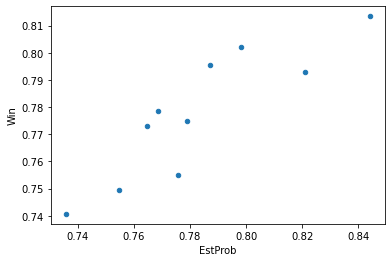

In [120]:
selection_data['bin'] = pd.qcut(selection_data['EstProb'], 10, duplicates='drop')

dots = selection_data.groupby(['bin'])[['EstProb', 'Win']].agg('mean')
dots = dots.reset_index()
dots.plot.scatter('EstProb','Win')

In [121]:
selection_data[['EstProb', 'Win']].mean()

EstProb    0.779335
Win        0.772418
dtype: float64

In [122]:
# Relief pitchers data

# Reduce noise by using rolling windows to calculate moving averages over seasons for park records, batting records, and pitching records.
# Improve to weighted averages

# Start including data from current season

# Relief pitchers data

# Game Scores/ELOs

# Team ratings

# Better Pitcher overall ratings

# Merge in 538 ELO ratings


# Set up S3 if necessary for size, or for GPUs

# Check # training observations for each model fit 
# and make sure we aren't losing any

# Ensemble methods for NN and logistic

# Rest days

# Adjust Pitcher and Batter stats for park record ( merge it in and divide) - compare adjusted at home and away stats

# New pitcher flag?

# Find out where they are in the rotation

# Fix training so that it doesn't need to specify number of variables

# Split up grid search vs. non-grid search training

# optimal skip strategy

# Why is Win missing? Check merge loss

# Time-series CV

# Come up with potential guesses remaining counter (get schedule?)

# Clean up program to select paramaters from sgd and feed them into NN

# add random state var to imputer and anything else random for repeatability

# Predict closer from roster and then use their rgs to construct estimated closing rgs (or just rgs for closing team)

# why is g d boost AUC ROC so low? check on test set

# predicting game length

# Calculate streaks by aggregating predictions by day and not counting if any pick loses.

# add league dummy to model

In [123]:
restricted = selection_data.loc[
#     (selection_data['EstProb'] >= .74) &
#     (selection_data['park_factor'] >= 1) &
    (selection_data['spot'] <= 4),
    ['Win', 'year']
]

In [124]:
restricted= restricted.astype({'Win':'int8'})
restricted = streak_counter(restricted)
streaks = restricted.groupby('streak_id').agg({'streak_counter':'max'})
streaks['streak_counter'].max()

34

In [125]:
Wins = restricted.loc[
    (restricted['Win'] == True),
    'Win'].count()
Loses = restricted.loc[
    (restricted['Win'] == False),
    'Win'].count()
WinRate = round( (Wins / (Wins + Loses)) *100, 1)
print(str(WinRate) + '%')

77.2%


In [126]:
year_results = restricted.groupby('year').agg({'Win':'mean', 'streak_counter':'max'})
year_results

,Win,streak_counter
year,,
2000.0,0.769231,16
2001.0,0.781609,17
2002.0,0.842254,29
2003.0,0.759887,20
2004.0,0.780627,25
2005.0,0.780899,17
2006.0,0.726257,18
2007.0,0.785915,22
2008.0,0.774929,16


In [127]:
year_results['streak_counter'].sum()

413

In [128]:
selection_data = selection_data.sort_values(['year', 'Date'])

In [76]:
selection_data['pick_day'] = selection_data.groupby(['year']).cumcount() + 1
selection_data['pick_day'] = np.ceil(selection_data['pick_day'] / 2)

In [77]:
year_results.sort_values(['Win'], ascending=[False])

,Win,streak_counter
year,,
2002.0,0.842254,29
2020.0,0.798507,25
2019.0,0.796610,17
2015.0,0.789326,15
2018.0,0.788043,23
2007.0,0.785915,22
2009.0,0.782123,34
2001.0,0.781609,17
2005.0,0.780899,17
